<a href="https://colab.research.google.com/github/pireylow/LSTM-keras-stock-price-prediction/blob/main/Breakout_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install yfinance


In [10]:

#import necessary modules
import random
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()

In [11]:
#set stock information

ticker = 'SPY'

startdate = '2018-01-01'
enddate = '2023-01-01'
period = '1d'

start = pd.to_datetime(startdate)
end = pd.to_datetime(enddate)
sdata = pdr.get_data_yahoo(ticker, start=start, end=end, interval = period)

columnsTitles=['Open','High','Low','Close','Volume','Adj Close']
sdata=sdata.reindex(columns=columnsTitles)

[*********************100%***********************]  1 of 1 completed


In [12]:
close=sdata['Close'].dropna()
close.describe()

count    1259.000000
mean      344.338904
std        66.595683
min       222.949997
25%       283.980011
50%       326.859985
75%       402.525009
max       477.709991
Name: Close, dtype: float64

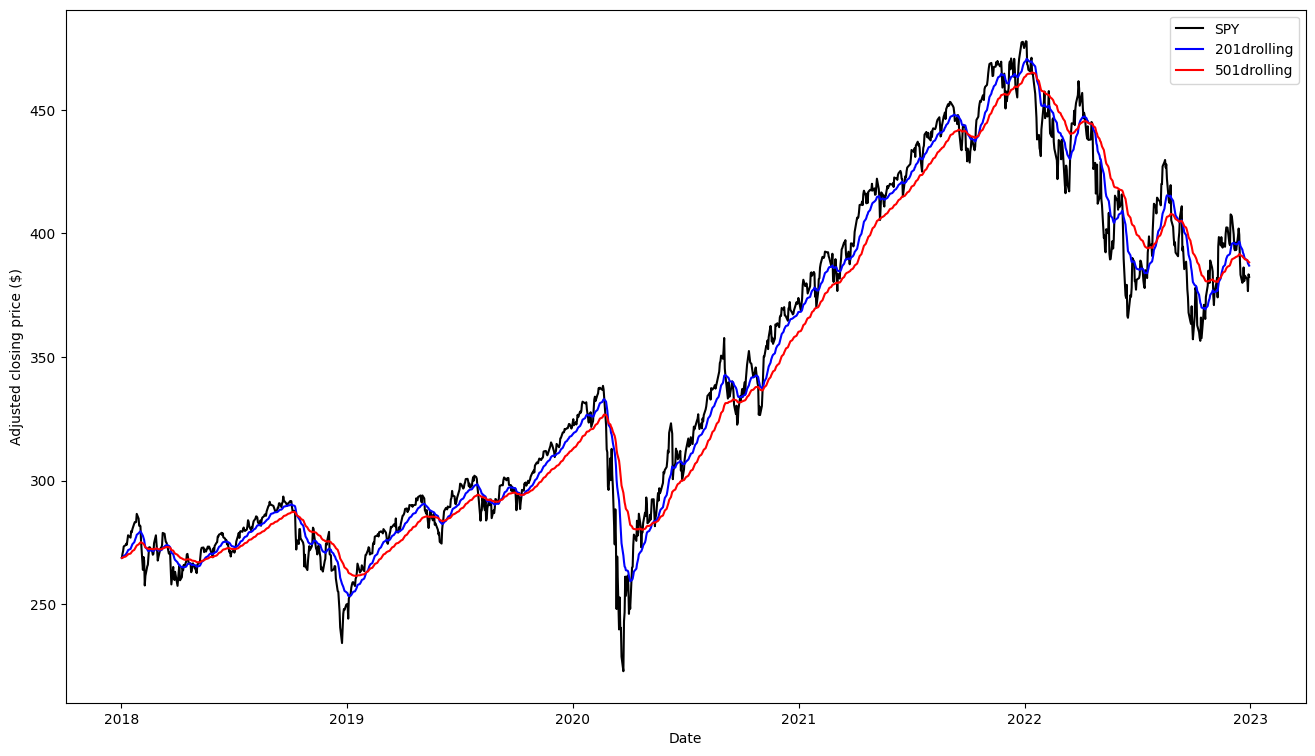

In [13]:
# Calculate the moving averages of the closing prices
fast_val = 20
slow_val = 50


#short_rolling = close.rolling(window=fast_val).mean()
#long_rolling = close.rolling(window=slow_val).mean()
short_rolling = close.ewm(span=fast_val, adjust=False).mean()
long_rolling = close.ewm(span=slow_val, adjust=False).mean()

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label=ticker, color = 'k')
ax.plot(short_rolling.index, short_rolling, label=str(fast_val)+ period + 'rolling',color = 'b')
ax.plot(long_rolling.index, long_rolling, label=str(slow_val)+ period + 'rolling',color = 'r')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()


16.1600341796875


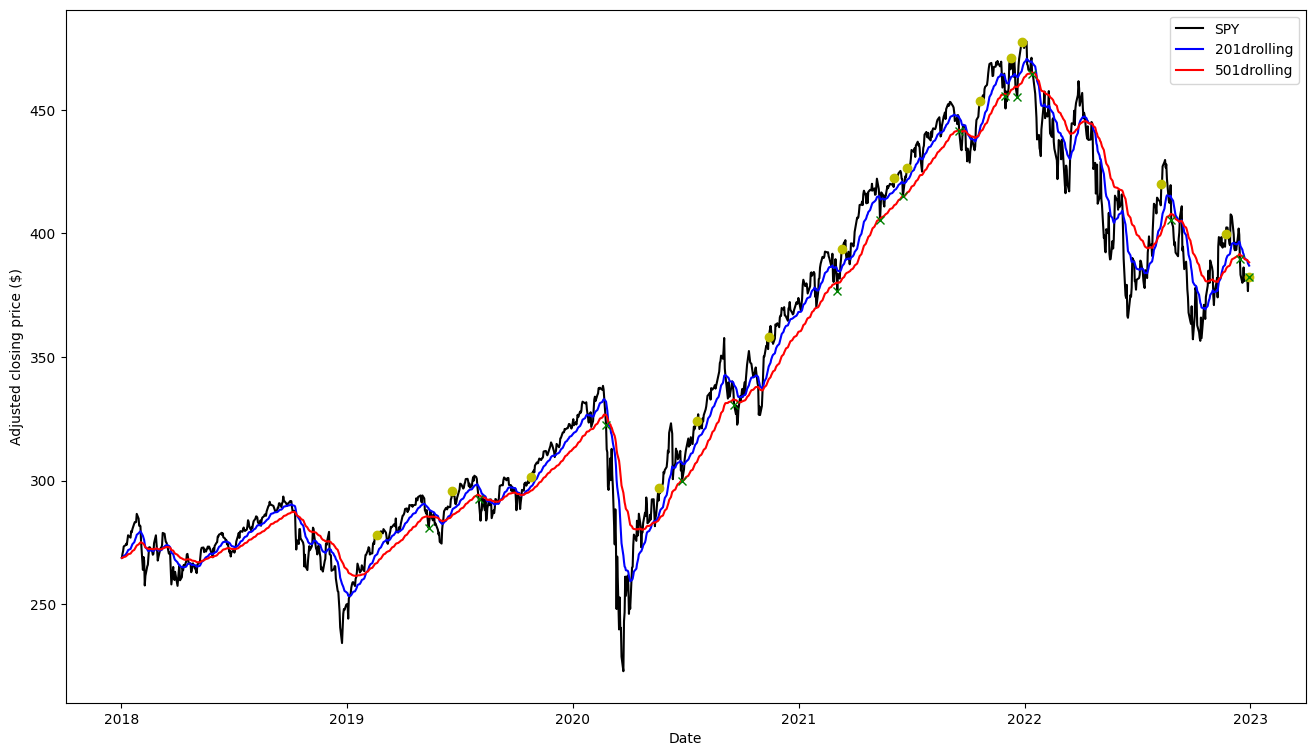

In [14]:


#short_rolling = close.rolling(window=fast_val).mean()
#long_rolling = close.rolling(window=slow_val).mean()
short_rolling = close.ewm(span=fast_val, adjust=False).mean()
long_rolling = close.ewm(span=slow_val, adjust=False).mean()
#
# Plot everything by leveraging the very powerful matplotlib package
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(close.index, close, label=ticker, color = 'k')
ax.plot(short_rolling.index, short_rolling, label=str(fast_val)+ period + 'rolling',color = 'b')
ax.plot(long_rolling.index, long_rolling, label=str(slow_val)+ period + 'rolling',color = 'r')

ax.set_xlabel('Date')
ax.set_ylabel('Adjusted closing price ($)')
ax.legend()

time_counter = 250
break_level_count = 50
profit_list = [ ]
profit_info = [ ]
profit = 0
FF_loop_flag = True
while FF_loop_flag:

  #FF to breakout and save the entry price
  while FF_loop_flag and close[time_counter] <= max(close[time_counter-break_level_count:time_counter]):
    time_counter += 1
    if time_counter >= len(short_rolling):
      FF_loop_flag = False
      time_counter -= 1

  entry_price = close[time_counter]
  profit_info.append(('entry', time_counter, entry_price))
  ax.plot(close.index[time_counter], entry_price, 'o', color = 'y')

  #FF to first close below slow MA and save the entry price long_rolling[[time_counter]
  while FF_loop_flag and close[time_counter] >= long_rolling[time_counter]:
#  while FF_loop_flag and close[time_counter] >= entry_price:
    time_counter += 1
    if time_counter >= len(short_rolling):
      FF_loop_flag = False
      time_counter -= 1
  exit_price = close[time_counter]
  profit = profit + (exit_price - entry_price)
  profit_info.append(('exit', time_counter, exit_price, exit_price - entry_price))
  profit_list.append(exit_price - entry_price)
  ax.plot(close.index[time_counter], exit_price, 'x', color = 'g')



print(profit)

In [15]:
profit

16.1600341796875

In [16]:
profit_list

[3.009979248046875,
 -3.239990234375,
 20.82000732421875,
 3.1199951171875,
 6.329986572265625,
 18.600006103515625,
 11.8800048828125,
 -7.67999267578125,
 14.790008544921875,
 1.970001220703125,
 -15.759979248046875,
 -12.730010986328125,
 -14.67999267578125,
 -10.269989013671875,
 0.0]